In [23]:
import data_prep
from mpaa_analysis import *
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Data Parsing

In [2]:
%%time

genre_listing = data_prep.read_genres('imdb/genres.list')
rating_listing = data_prep.read_ratings('imdb/ratings.list')
mpaa = data_prep.read_mpaa('imdb/mpaa-ratings-reasons.list')

movies = data_prep.merge_all(rating_listing, genre_listing, mpaa)

train, test = split_data(movies)

vectorizer, train_data_features = create_train_features(train)
test_data_features = create_test_features(test, vectorizer)

Parsing genre list documentation block
Reading genre list into memory
Parsing ratings documentation block
Parse ratings lines and convert to DataFrame
Filter set to true, ignoring entries with <1000 entries
31783 movies returned
Opening mpaa files
Cleaning mpaa data
Performing initial merge
Cleaning title
CPU times: user 19.4 s, sys: 1.15 s, total: 20.6 s
Wall time: 23.2 s


##Classifier Training and Prediction

In [3]:
forest = fit_random_forest(train, train_data_features, 'label')
xforest = fit_xrandom_forest(train, train_data_features, 'label')
trees = fit_dectree(train, train_data_features, 'label')

In [5]:
test_forest = pred_random_forest(test, test_data_features, forest)
test_xforest = pred_xrandom_forest(test, test_data_features, forest)
test_trees = pred_dectree(test, test_data_features, forest)

In [21]:
tree_conf = confusion_matrix(test_trees.label.astype('str').values,
                             test_trees.predictions.astype('str').values)

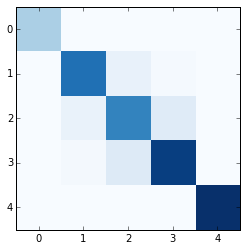

In [28]:
tree_conf_norm = tree_conf.astype('float') / tree_conf.sum(axis=1)
plt.imshow(tree_conf_norm, interpolation='nearest', cmap=plt.cm.Blues)